# Data analysis and visualization: English Premier League & UEFA Champions League Winner  2018-19

* **Physical attribute**: Correlation between Body Mass Index of the players and stamina to asses how much prepration goes behind in keeping the player ready to meet phsical demands of a long season. 
* **Cost effectiveness** Comparing the Wages for the players to assess how much money was spent in wages to acheive the results.
* **Home talent** Ratio of home and foreign players in the respective team to assess how much importance do the club give to groom players for national team
* **Playing Attribute** Positioning,composure and weaker foot ability of the players to assess how effective are player's positioning and composure in the field which helps in gameplay and ultimately in scoring/defending  goals during matches.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data from current working directory
df= pd.read_csv("Data.csv")

In [3]:
df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [4]:
#Checking the number of rows and columns in the dataframe
df.shape

(18207, 89)

In [5]:
#Selecting only Liverpool and Man City player from the whole dataframe
df= df[(df['Club']== 'Liverpool') |(df['Club']== 'Manchester City')]

In [6]:
#Modifying name for convinience
df['Club'].replace('Manchester City','Man City',inplace=True)

In [7]:
#Checking the columns names in dataframe to determine which columns will be required to achieve the objective of the project
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
#removing unnecessary columns and trimming the data
df.drop(['Unnamed: 0', 'ID','Flag','Club Logo','Photo','Special','Body Type','Real Face','Jersey Number','Joined', 'Loaned From','Contract Valid Until','LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Release Clause','Potential','Skill Moves','Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
'Jumping', 'LongShots', 'Aggression','Interceptions','Vision', 'Work Rate','Penalties','Marking', 'StandingTackle', 'SlidingTackle','Preferred Foot','GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace =True)
df.head(5)

,Name,Age,Nationality,Overall,Club,Value,Wage,International Reputation,Weak Foot,Position,Height,Weight,Stamina,Strength,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Man City,€102M,€355K,4.0,5.0,RCM,5'11,154lbs,90.0,75.0,87.0,88.0
13,David Silva,32,Spain,90,Man City,€60M,€285K,4.0,2.0,LCM,5'8,148lbs,78.0,52.0,89.0,93.0
23,S. Agüero,30,Argentina,89,Man City,€64.5M,€300K,4.0,4.0,ST,5'8,154lbs,76.0,73.0,92.0,90.0
26,M. Salah,26,Egypt,88,Liverpool,€69.5M,€255K,3.0,3.0,RM,5'9,157lbs,84.0,70.0,90.0,91.0
55,L. Sané,22,Germany,86,Man City,€61M,€195K,2.0,3.0,LW,6'0,165lbs,79.0,70.0,84.0,78.0


In [9]:
#checking rows and columns after dropping a few columns
df.shape

(66, 16)

In [10]:
#Checking the types of position

In [11]:
df['Position'].unique()

array(['RCM', 'LCM', 'ST', 'RM', 'LW', 'RW', 'GK', 'LM', 'LCB', 'CAM',
       'CDM', 'CB', 'RB', 'CM', 'RCB', 'LB'], dtype=object)

In [12]:
#Grouping players collectively into three position
df['Position'].replace(['RCM','LCM','RM','LW','RW','LM','CAM','CDM','CM'],'Midfielder',inplace=True)
df['Position'].replace(['CB','RB','RCB','LB','LCB','GK'],'Defender',inplace=True) # Clubbing GK along with defenders
df['Position'].replace('ST','Striker',inplace=True)


In [13]:
df['Position'].unique() #cross-checking 

array(['Midfielder', 'Striker', 'Defender'], dtype=object)

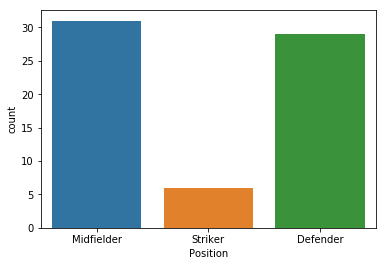

In [14]:
# countplot for number of players by position
sns.countplot(x='Position',data=df)

In [15]:
#Modifying wage and weight columns 


In [16]:
#Checking data type before initiating modification of the columns
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Value                        object
Wage                         object
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Weight                       object
Stamina                     float64
Strength                    float64
Positioning                 float64
Composure                   float64
dtype: object

In [17]:
#Height and Weight are of object type which is in accordance to our requirement for now so as to perform string operation 

In [18]:
df['Wage'] =df['Wage'].apply(lambda x: x.strip('€'))
df['Wage']= df['Wage'].apply(lambda x: x.replace('K', '000'))
df.rename(columns={'Wage' :'Wage_€'}, inplace= True)

df['Weight'] =df['Weight'].apply(lambda x: x.strip('lbs'))
df.rename(columns={'Weight' :'Weight_lbs' }, inplace= True)

#Changing from object to float type
df['Weight_lbs'] = df.Weight_lbs.astype(float)    


#pounds to kg
df['Weight_kg'] = df['Weight_lbs'].apply(lambda x: x*0.453592)  
df.drop(['Weight_lbs'], axis = 1, inplace= True)

df.head(3)

,Name,Age,Nationality,Overall,Club,Value,Wage_€,International Reputation,Weak Foot,Position,Height,Stamina,Strength,Positioning,Composure,Weight_kg
4,K. De Bruyne,27,Belgium,91,Man City,€102M,355000,4.0,5.0,Midfielder,5'11,90.0,75.0,87.0,88.0,69.853168
13,David Silva,32,Spain,90,Man City,€60M,285000,4.0,2.0,Midfielder,5'8,78.0,52.0,89.0,93.0,67.131616
23,S. Agüero,30,Argentina,89,Man City,€64.5M,300000,4.0,4.0,Striker,5'8,76.0,73.0,92.0,90.0,69.853168


In [19]:
#Converting unit of Height from feet-inches to metres  for BMI calculation

In [20]:

df[['Feet','Inch']] = df.Height.str.split("'",expand=True,) 
df.head(3)
df['Inch'] = df.Inch.astype(float)
df['Feet'] = df.Feet.astype(float)

#feet to inches
df['Feet'] = df['Feet'].apply(lambda x: x*12) 

#adding the columns whose values are in inches
df['Height_inches']=df['Feet'] + df['Inch']

# inches to metres
df['Height_metres'] = df['Height_inches'].apply(lambda x: x*0.0254) 

In [21]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Value                        object
Wage_€                       object
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Stamina                     float64
Strength                    float64
Positioning                 float64
Composure                   float64
Weight_kg                   float64
Feet                        float64
Inch                        float64
Height_inches               float64
Height_metres               float64
dtype: object

In [22]:
#dropping Feet, Inches, Height_inches since Height_metres have been created

df.drop(['Feet', 'Inch','Height_inches'], axis = 1, inplace= True)

In [23]:
#Calculating BMI


df['BMI']=df['Weight_kg']/ (df['Height_metres'] * df['Height_metres'])
df.head()

,Name,Age,Nationality,Overall,Club,Value,Wage_€,International Reputation,Weak Foot,Position,Height,Stamina,Strength,Positioning,Composure,Weight_kg,Height_metres,BMI
4,K. De Bruyne,27,Belgium,91,Man City,€102M,355000,4.0,5.0,Midfielder,5'11,90.0,75.0,87.0,88.0,69.853168,1.8034,21.478402
13,David Silva,32,Spain,90,Man City,€60M,285000,4.0,2.0,Midfielder,5'8,78.0,52.0,89.0,93.0,67.131616,1.7272,22.503074
23,S. Agüero,30,Argentina,89,Man City,€64.5M,300000,4.0,4.0,Striker,5'8,76.0,73.0,92.0,90.0,69.853168,1.7272,23.415360
26,M. Salah,26,Egypt,88,Liverpool,€69.5M,255000,3.0,3.0,Midfielder,5'9,84.0,70.0,90.0,91.0,71.213944,1.7526,23.184590
55,L. Sané,22,Germany,86,Man City,€61M,195000,2.0,3.0,Midfielder,6'0,79.0,70.0,84.0,78.0,74.842680,1.8288,22.377775


# Dataframe is ready for further visualization and Analysis in accordance to the objective of the project

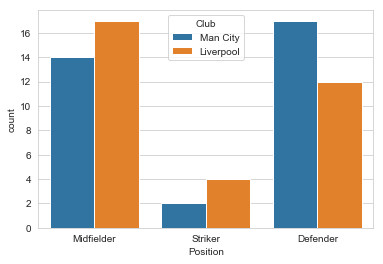

In [65]:
#Distribution of player by position for Man City and Liverpool

sns.countplot(x='Position',data=df,hue='Club')

# Physical Attribute

## Plotting the stamina distplot 

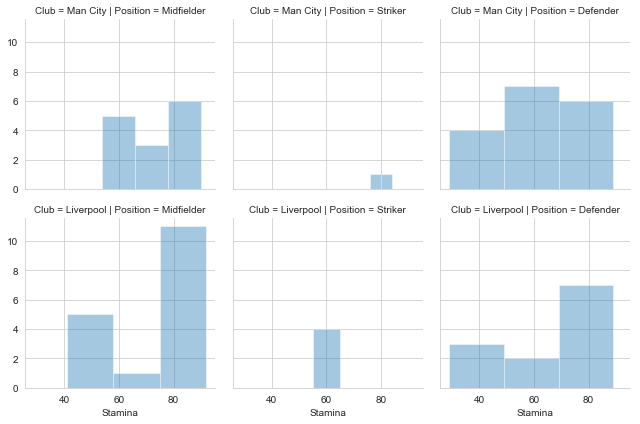

In [61]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(sns.distplot,'Stamina',kde=False)

## Plotting the stamina vs BMI 

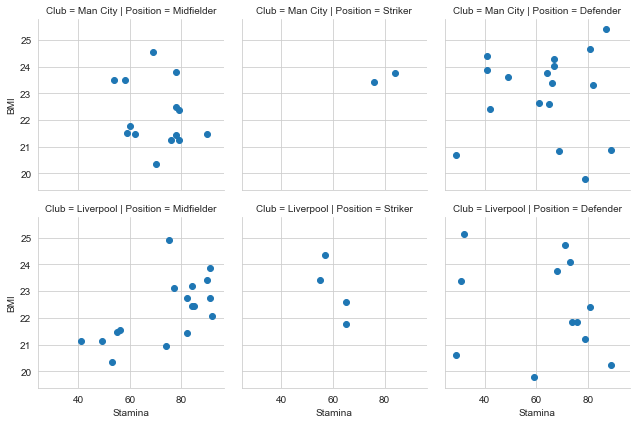

In [49]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(plt.scatter,'Stamina','BMI')

## Conclusion : Physical Attribute

# Cost effectiveness

## Total money spent by both the clubs in wages

In [100]:
Total_money_wage= df.groupby('Club')['Wage_€'].sum()
Total_money_wage

Club
Liverpool    2902000.0
Man City     3741000.0
Name: Wage_€, dtype: float64

## Plotting boxplot to look at the wage distribution: Median, Max, Min and outlier if any

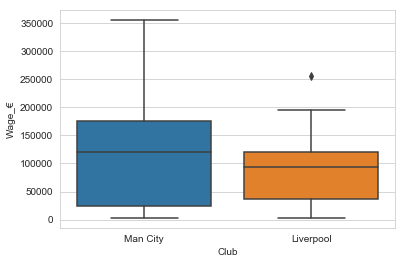

In [74]:
sns.boxplot(x='Club', y= 'Wage_€',data=df)

## Barplot to look at  the mean of the wages

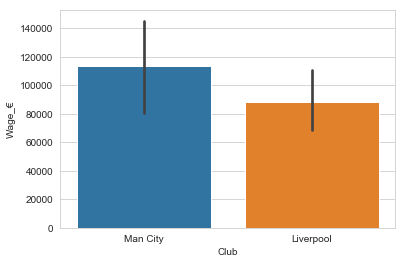

In [73]:
sns.barplot(x='Club',y='Wage_€',data=df)

## Barplot to look at standard deviation in wage

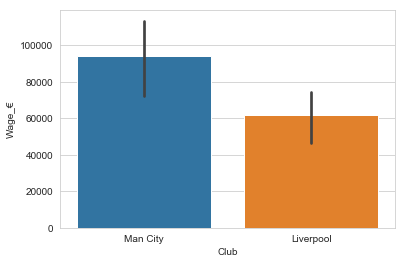

In [101]:
sns.barplot(x='Club',y='Wage_€',data=df,estimator=np.std)

## Regression line: Overall Vs Wage

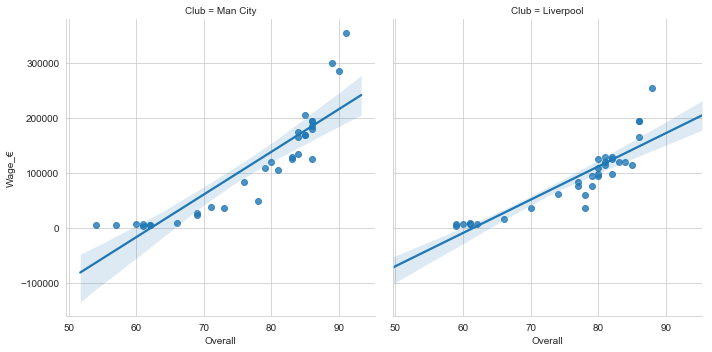

In [89]:
sns.lmplot(x='Overall',y='Wage_€',data=df,col='Club')

## Conclusion : Cost effectiveness
Man City and Liverpoo

C:\Users\Barun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


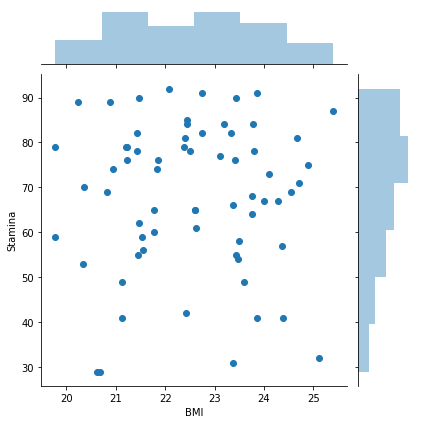

In [25]:
sns.jointplot(x='BMI',y= 'Stamina', data= df)

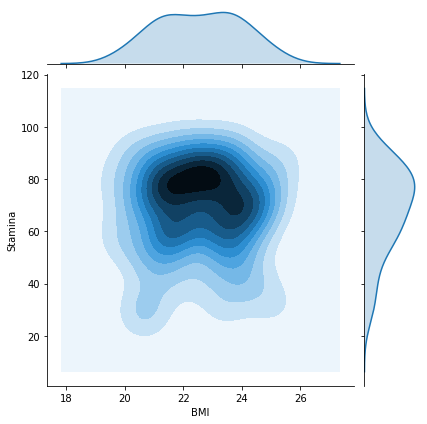

In [26]:
sns.jointplot(x='BMI',y= 'Stamina', data= df, kind = 'kde')

In [27]:
#sns.pairplot(df, hue= "Club")

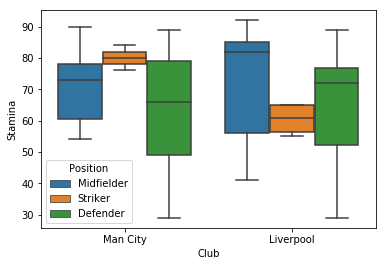

In [28]:
sns.boxplot(x='Club', y= 'Stamina',data=df,hue= 'Position')

In [29]:
tc=df.corr()

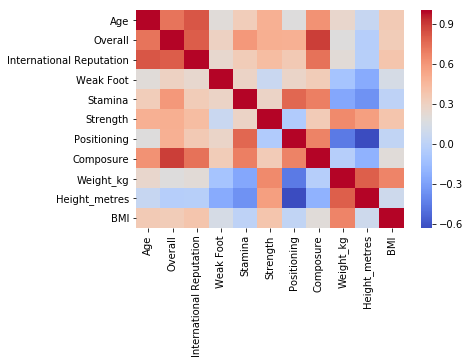

In [30]:
sns.heatmap(tc,cmap='coolwarm')

In [31]:
df['Wage_€'] = df['Wage_€'].astype(float)
df.pivot_table(index='Club',columns='Overall',values='Wage_€')

Overall,54,57,59,60,61,62,66,69,70,71,...,81,82,83,84,85,86,88,89,90,91
Club,,,,,,,,,,,,,,,,,,,,,
Liverpool,NaN,NaN,5500.0,7000.0,7666.666667,8000.0,17000.0,NaN,37000.0,NaN,...,121666.666667,117666.666667,120000.0,120000.000000,115000.000000,185000.0,255000.0,NaN,NaN,NaN
Man City,6000.0,6000.0,NaN,7000.0,5000.000000,6000.0,10000.0,26000.0,NaN,38000.0,...,105000.000000,NaN,127500.0,158333.333333,181666.666667,176000.0,NaN,300000.0,285000.0,355000.0


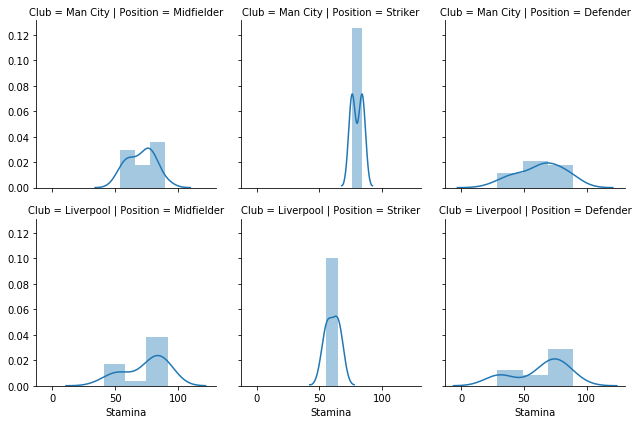

In [32]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(sns.distplot,'Stamina')

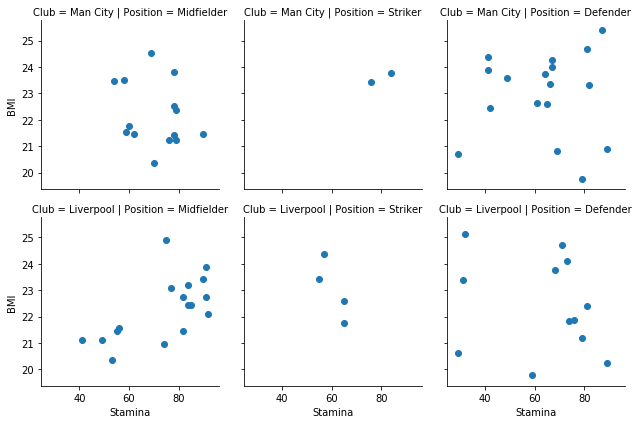

In [33]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(plt.scatter,'Stamina','BMI')

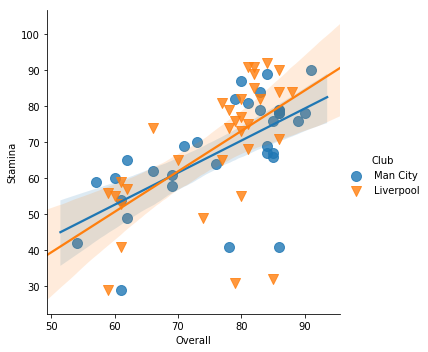

In [34]:
sns.lmplot(x='Overall',y='Stamina',data=df,hue='Club',markers=['o','v'],scatter_kws={'s':100})

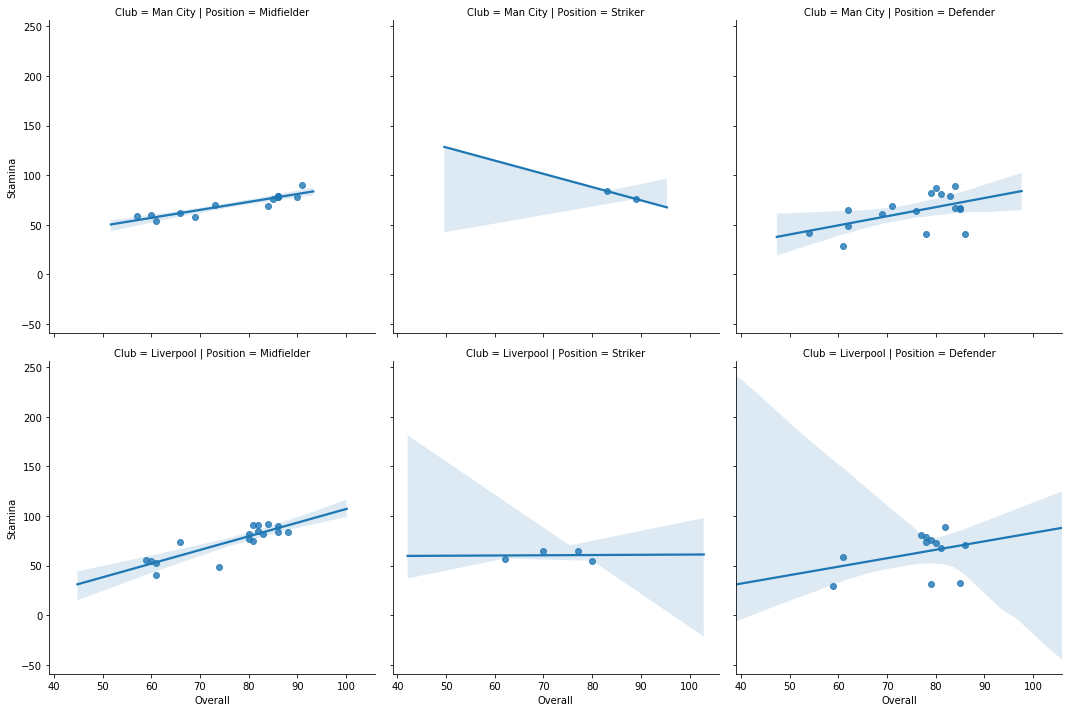

In [35]:
sns.lmplot(x='Overall',y='Stamina',data=df,col='Position',row='Club')

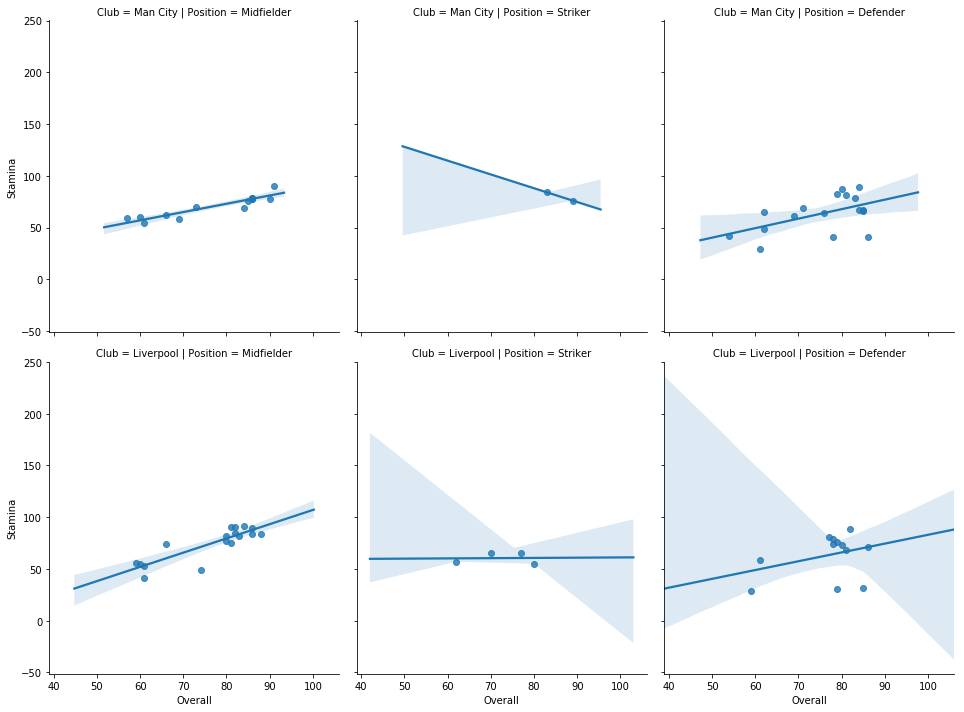

In [36]:
#same plot as above but changing aspect and size
sns.lmplot(x='Overall',y='Stamina',data=df,col='Position',row='Club',aspect=0.9,height=5)

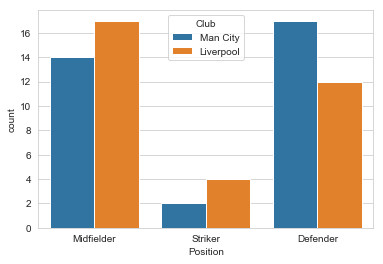

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Position',data=df,hue='Club')